<a href="https://colab.research.google.com/github/adgcal/CD-Analysis/blob/master/fresh_cd_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [4]:
os.chdir("/content/drive/My Drive/Raja_CD/")
!ls *.xlsx

AMV_Data_All.xlsx  AMV_Data.xlsx


In [5]:
df1=pd.read_excel('AMV_Data.xlsx',sheet_name="0% TFE")
df2=pd.read_excel('AMV_Data.xlsx',sheet_name="10% TFE")
df3=pd.read_excel('AMV_Data.xlsx',sheet_name="20% TFE")
df4=pd.read_excel('AMV_Data.xlsx',sheet_name="30% TFE")
df5=pd.read_excel('AMV_Data.xlsx',sheet_name="Acetonitrile")
df6=pd.read_excel('AMV_Data.xlsx',sheet_name="Methanol")



In [6]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)

In [7]:
def readCDT(df):
  
  T=findT(df)
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(r'$T$ Variation')
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 


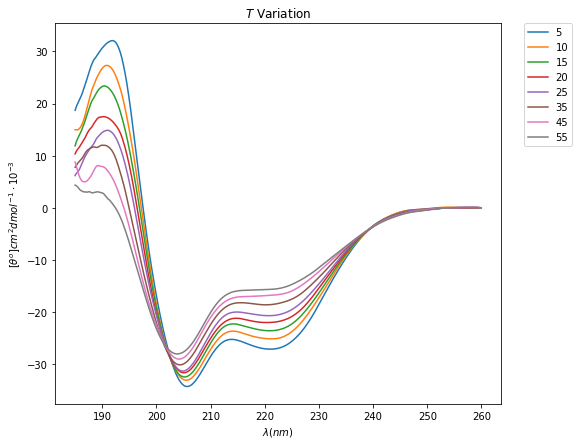

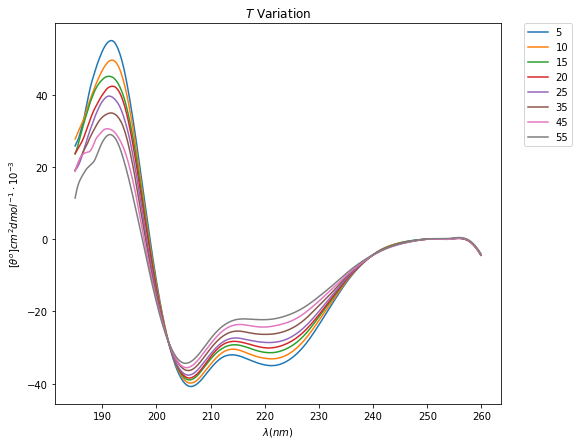

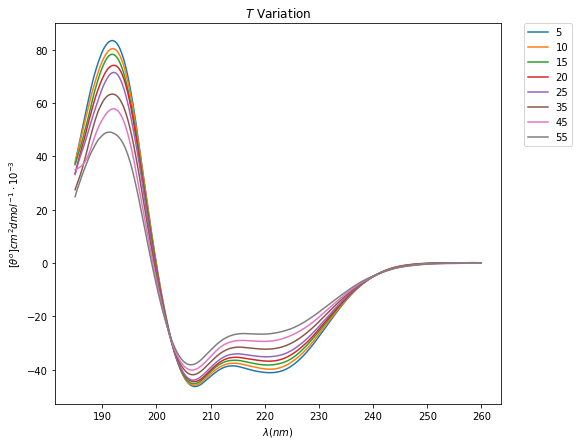

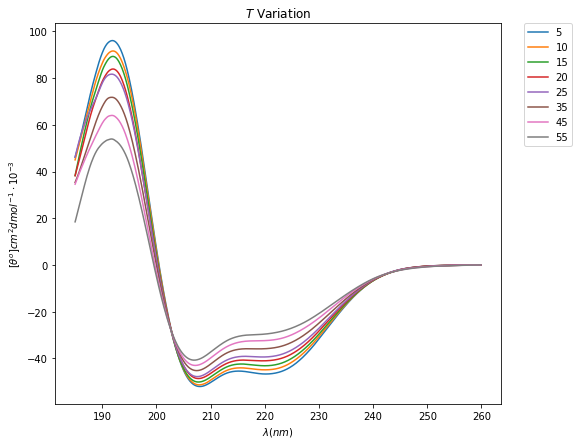

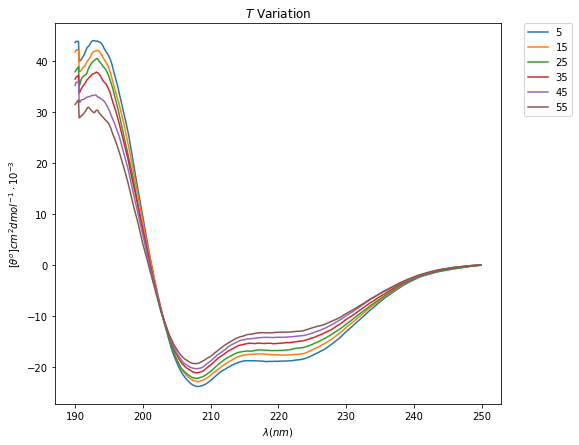

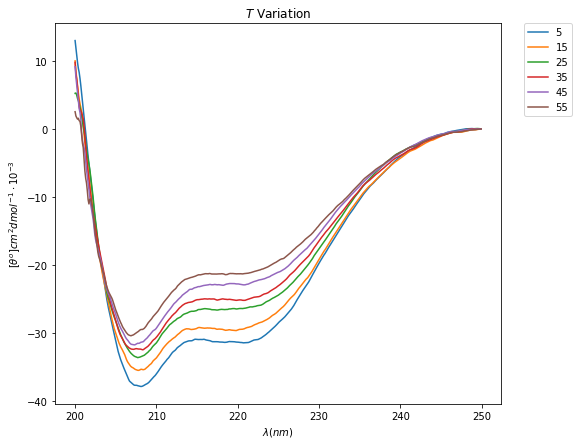

In [8]:
T1,lam1,X1 =readCDT(df1)
T2,lam2,X2 =readCDT(df2)
T3,lam3,X3 =readCDT(df3)
T4,lam4,X4 =readCDT(df4)
T5,lam5,X5 =readCDT(df5)
T6,lam6,X6 =readCDT(df6)

In [9]:
def ratio_plots(TT,X,lam):
  # T  and X are obtained from function readcdT
  # Given X the function plots the ratio 
  # of 222:206 and 192:206 
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig,ax =  plt.subplots(2,2,figsize=(10,8))

  #fig, (ax1, ax2,ax3,ax4) = plt.subplots(2, 2, figsize=(6,4))
  #plt.subplots_adjust(wspace=0.3, hspace=0.2)
  # ax[0][0].set_title("222:206")
  # ax[0][1].set_title("222:206")
  # ax[1][0].set_title("Ratio(R) Plots")
  # ax[1][1].set_title("Inv R Plots")



  ax[0][0].plot(TT,rat1,'bo-')
  ax[0][1].plot(TT,rat2,'co-')
  ax[1][0].plot(rat1,rat2,'ro-')
  ax[1][1].plot(1./rat1,1/rat2,'go-')
  ax[0][0].set(xlabel='T$^o$C', ylabel='R1')
  ax[0][1].set(xlabel='T$^o$C', ylabel='R2')
  ax[1][0].set(xlabel='R1', ylabel='R2')
  ax[1][1].set(xlabel='1/R1', ylabel='1/R2')

  return rat1,rat2



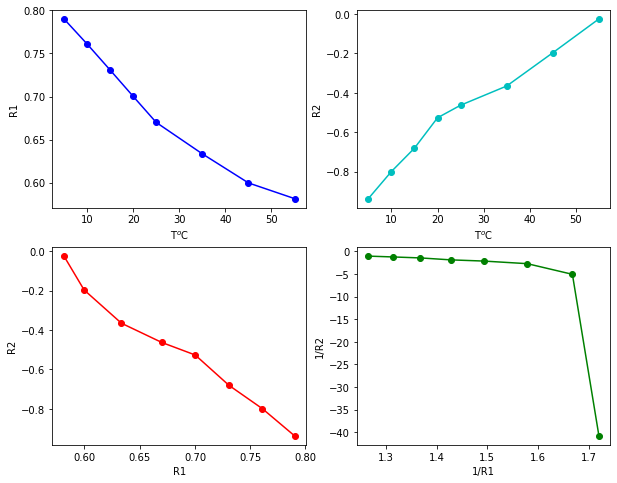

In [10]:
[u1,v1]=ratio_plots(T1,X1,lam1)#0% TFE

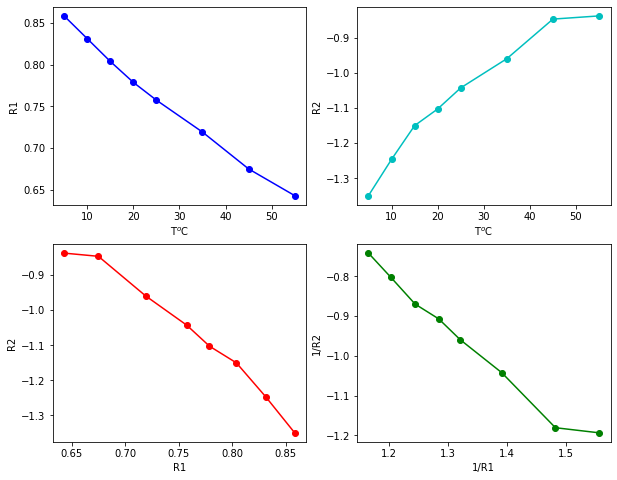

In [11]:
[u2,v2]=ratio_plots(T2,X2,lam2)#10%TFE

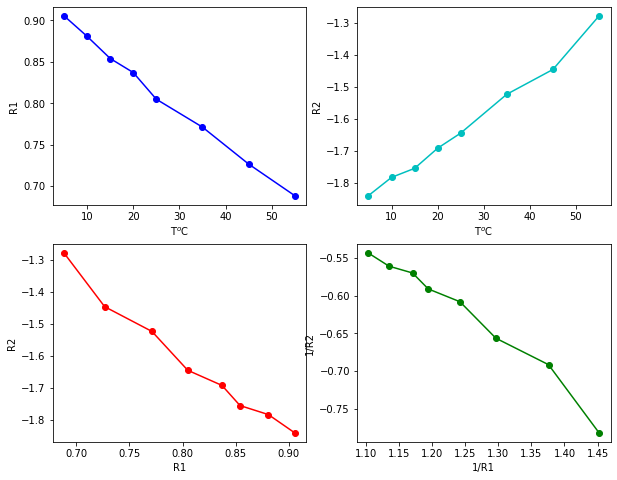

In [12]:
[u3,v3]=ratio_plots(T3,X3,lam3)# 20%TFE

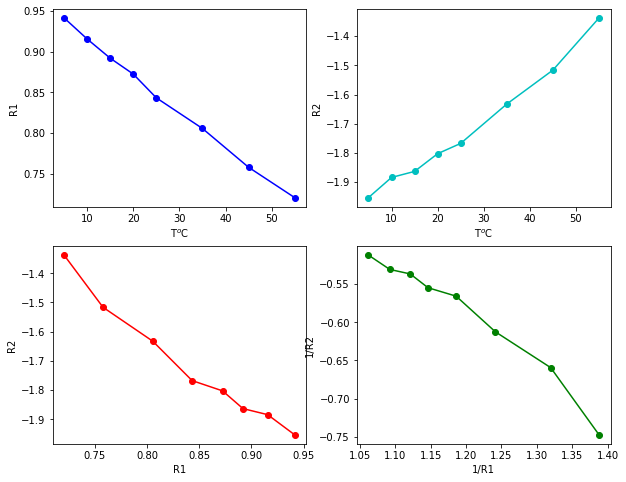

In [13]:
[u4,v4]=ratio_plots(T4,X4,lam4)#30%TFE

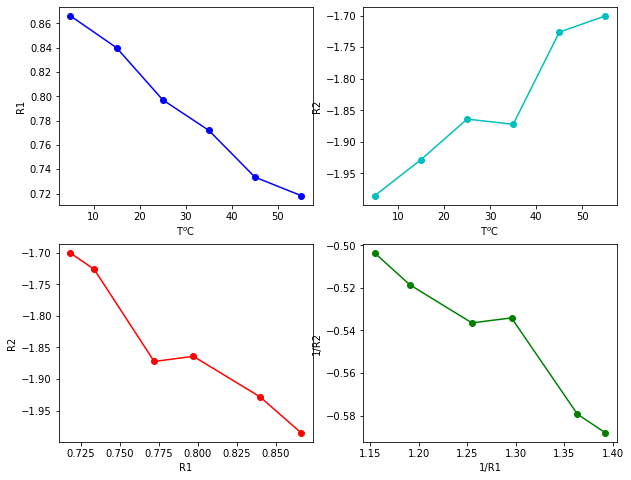

In [14]:
[u5,v5]=ratio_plots(T5,X5,lam5)#30%TFE

In [15]:
def eigen_reconstruct(k,X):
  from numpy import linalg as LA
  U, s, VT = LA.svd(X)
  Sigma = np.zeros((X.shape[0], X.shape[1]))
  Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
  X_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
  np.shape(VT)
  print("Initial population fraction of the two Major SVD componenrs",abs(np.round(VT[0,0],4)),abs(np.round(VT[1,0],4)))
  return X_approx,s,VT

In [16]:
X1_a,s1,VT1=eigen_reconstruct(2,X1)
X2_a,s2,VT2=eigen_reconstruct(2,X2)
X3_a,s3,VT3=eigen_reconstruct(2,X3)
X4_a,s4,VT4=eigen_reconstruct(2,X4)
X5_a,s5,VT5=eigen_reconstruct(2,X5)
X6_a,s6,VT6=eigen_reconstruct(2,X6)



Initial population fraction of the two Major SVD componenrs 0.4333 0.5219
Initial population fraction of the two Major SVD componenrs 0.4207 0.4857
Initial population fraction of the two Major SVD componenrs 0.4084 0.4069
Initial population fraction of the two Major SVD componenrs 0.4141 0.3865
Initial population fraction of the two Major SVD componenrs 0.4695 0.5053
Initial population fraction of the two Major SVD componenrs 0.4706 0.5418


In [17]:
def epec(k,X,s,lam):
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
    U, s, V = LA.svd(X)
    XY=U[:, :k] @ Sigma[:k, :k]
    np.shape(XY)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    ax1.plot(lam,XY[:,0])
    ax1.set_title("SVD 1")
    ax2.set_title("SVD 2")
    ax2.plot(lam,XY[:,1])
    return XY

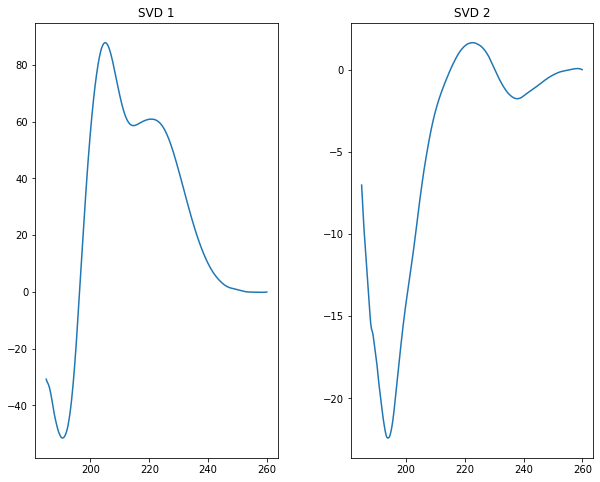

In [18]:
XY1=epec(2,X1_a,s1,lam1)


# 0% TFE 

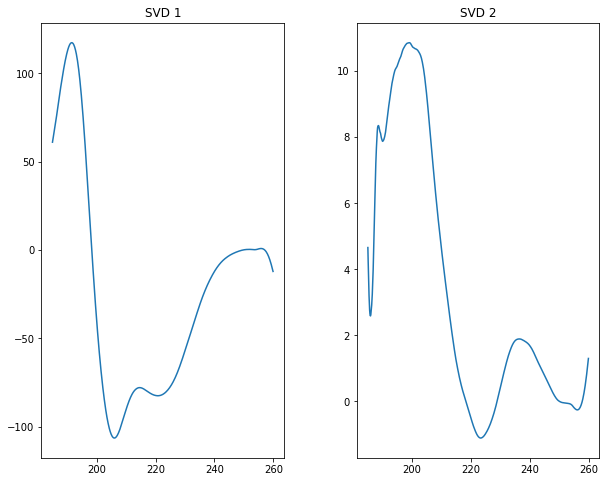

In [19]:
XY2=epec(2,X2_a,s2,lam2)



# 10% *TFE*

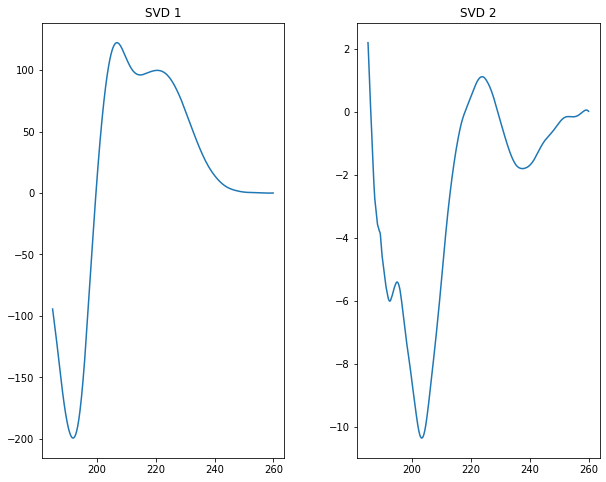

In [20]:
XY3=epec(2,X3_a,s3,lam3)


# 20% TFE 

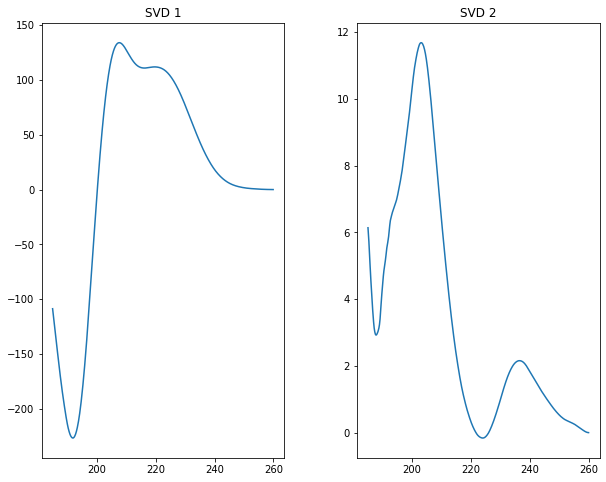

In [21]:
XY4=epec(2,X4_a,s4,lam4)


# 30% TFE

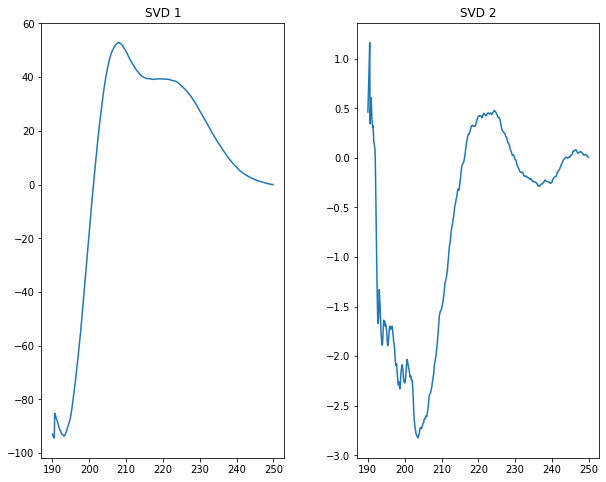

In [22]:
XY5=epec(2,X5_a,s5,lam5)


#Acetonitrile

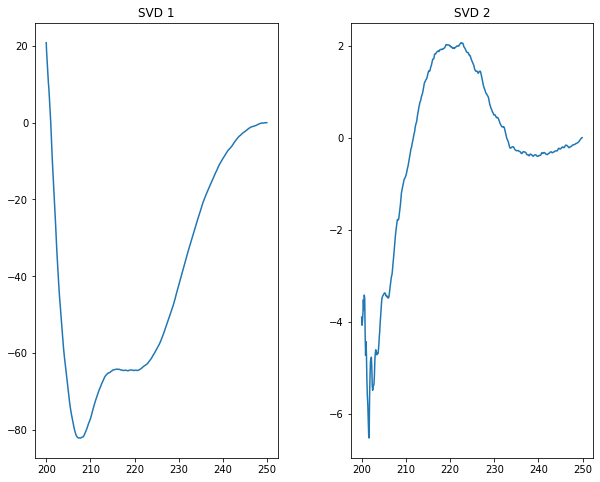

In [23]:
XY6=epec(2,X6_a,s6,lam6)



#Methanol 

# Question 
- The singular value components vary drastically 
- What causes  the overall helicity to vary in a systematic manner?

# van't Hoff Approach 
    - $f = f_o.e^ \frac{-\Delta G_o}{RT}$
    - Thus if we plot log(f) against 1/T we may get an approximate value of thermodynamic parametrs 
    - See  <https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van't_Hoff_Equation></p>
    - The equation that follows is derivable assuming</p> $K_{eq}=f= \frac{helix}{coli}$</p>
 $\ln K = - \dfrac{\Delta_r{H^o}}{R} \dfrac{1}{T} + \dfrac{\Delta_r{S^o}}{R} $

* Plotting log(f) against 1/T, the slope and intercept will be enthalpy/R ad entropy/R . 
    


In [41]:
from scipy.constants import codata
F = codata.physical_constants['Faraday constant'][0]
qe = codata.physical_constants['elementary charge'][0]
R = codata.physical_constants['molar gas constant'][0]
kB = codata.physical_constants['Boltzmann constant'][0]
kB_eV = codata.physical_constants['Boltzmann constant in eV/K'][0]
N_A = codata.physical_constants['Avogadro constant'][0]
F, R, qe, kB, kB_eV, N_A

(96485.33212,
 8.314462618,
 1.602176634e-19,
 1.380649e-23,
 8.617333262e-05,
 6.02214076e+23)

In [42]:
from scipy.optimize import curve_fit
def linfit(x, m, c):
    return m*x+c


dG=pd.read_csv('free.csv')
l=list(dG.columns.values)
T=dG[l[0]]+273.0
# dG = -RT ln K 
# ln K = -dG/RT
x=1/T
# If expressed in cal R should be 0.24*R
# R (J/K)=> 0.24*R (cal/K)

R=0.24*R
R


1.99547102832

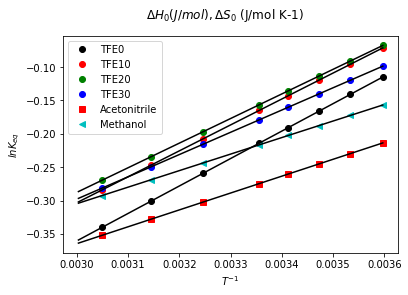

In [43]:

# Y => delta G in the data sheet. Thus ln K = -Y/RT 
y1=dG['TFE0']
y2=dG['TFE10']
y3=dG['TFE20']
y4=dG['TFE30']
y5=dG['Acetonitrile']
y6=dG['Methanol']
pars1, cov1 = curve_fit(f=linfit, xdata=1/T, ydata=-y1/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars2, cov2 = curve_fit(f=linfit, xdata=1/T, ydata=-y2/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars3, cov3 = curve_fit(f=linfit, xdata=1/T, ydata=-y3/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars4, cov4 = curve_fit(f=linfit, xdata=1/T, ydata=-y4/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars5, cov5 = curve_fit(f=linfit, xdata=1/T, ydata=-y5/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars6, cov6 = curve_fit(f=linfit, xdata=1/T, ydata=-y6/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x,-y1/(R*T),'ko',label='TFE0')
plt.plot(x,-y2/(R*T),'ro',label='TFE10')
plt.plot(x,-y3/(R*T),'go',label='TFE20')
plt.plot(x,-y4/(R*T),'bo',label='TFE30')
plt.plot(x,-y5/(R*T),'rs',label='Acetonitrile')
plt.plot(x,-y6/(R*T),'c<',label='Methanol')

x_dummy=np.linspace(5,60,100)
x_dummy=1/(x_dummy+273.0)
y_dummy1=pars1[0]*x_dummy +pars1[1]
y_dummy2=pars2[0]*x_dummy +pars2[1]
y_dummy3=pars3[0]*x_dummy +pars3[1]
y_dummy4=pars4[0]*x_dummy +pars4[1]
y_dummy5=pars5[0]*x_dummy +pars5[1]
y_dummy6=pars6[0]*x_dummy +pars6[1]
plt.plot(x_dummy,y_dummy1,'k-')
plt.plot(x_dummy,y_dummy2,'k-')
plt.plot(x_dummy,y_dummy3,'k-')
plt.plot(x_dummy,y_dummy4,'k-')
plt.plot(x_dummy,y_dummy5,'k-')
plt.plot(x_dummy,y_dummy6,'k-')
plt.xlabel(r'$T^{-1} $')
plt.ylabel(r'$ln K_{eq}$')
plt.legend()
fig.suptitle('$\Delta H_0 (J/mol), \Delta S_0$ (J/mol K-1)')



def Merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 
d1={'deltaH0' :[-pars1[0],-pars2[0],-pars3[0],-pars4[0],-pars5[0],-pars6[0]]}
d2={'deltaS0' :[pars1[1],pars2[1],pars3[1],pars4[1],pars5[1],pars6[1]]}

dic = Merge(d1, d2) 













In [26]:
dff = pd.DataFrame.from_dict(dic) 
dff

,deltaH0,deltaS0
0,-820.33,-3.18
1,-775.03,-2.93
2,-735.36,-2.78
3,-665.32,-2.59
4,-504.23,-2.24
5,-494.05,-2.09


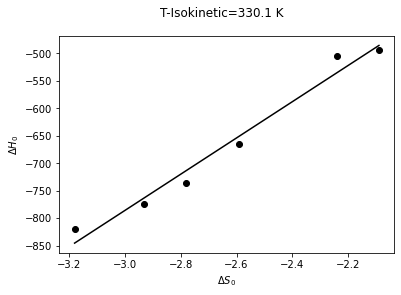

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dff['deltaS0'],dff['deltaH0'],'ko')
pp, cc = curve_fit(f=linfit, xdata=dff['deltaS0'], ydata=dff['deltaH0'], p0=[0, 0], bounds=(-np.inf, np.inf))
plt.plot(dff['deltaS0'],dff['deltaS0']*pp[0]+pp[1],'k')
plt.xlabel(r'$\Delta S_0 $')
plt.ylabel(r'$\Delta H_0 $')
fig.suptitle("T-Isokinetic=%.1f K" % pp[0])
plt.show()